[collab](https://drive.google.com/file/d/1l7ux4kHGZyiEY37RJ4ZvtruOJjHAt1HG/view?usp=sharing)

В этом семинаре мы будем использовать наши знания путорча приобретенные неделю назад. Мы будем исследовать KL дивергенцию, поговорим про другие метрики, обусудим плюсы и минусы каждой. 

Также мы разберем несколько современных метрик для картиночных генеративных моделей

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

import numpy as np


import torch
from torch import distributions as distrs
from torch.distributions.multivariate_normal import MultivariateNormal

from IPython.display import clear_output

Обозначим вспомогательные функции:

In [2]:
# Красиво рисует двумерное распределение
def plot_2d_dots(dots, color='blue', label='None'):
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.scatter(dots[:, 0], dots[:, 1], s=1, c=color, label=label)

def create_distr(mu, sigma):
    return distrs.MultivariateNormal(mu, sigma)

# Оборачивает параметры распределения в торчевские тензоры
def get_parameters(mu=0., sigma=1.):
    train_mu = torch.Tensor([mu, mu])
    train_mu.requires_grad=True
    train_sigma = torch.Tensor([[sigma, 0.0],
                                [0.0, sigma]])
    train_sigma.requires_grad=True
    return train_mu, train_sigma

def sample(d, num):
    return d.sample(torch.Size([num]))

# Глава 1, в которой студенты работают с унимодальным 2D распределением

##### Target distribution

In [3]:
mu = torch.Tensor([-5, -5])
sigma = torch.Tensor([[1., 0.0],
                      [0.0, 1.]])

target = create_distr(mu, sigma)
# x - samples from the target distribution
x = sample(target, 1000)
# px = p(x) = probability of target samples for the target distribution
px = target.log_prob(x).exp()

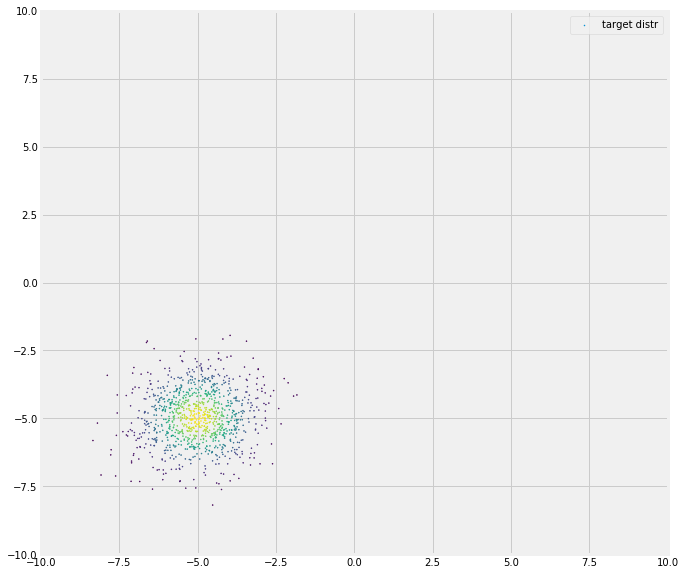

In [4]:
plt.figure(figsize=(10, 10))
plot_2d_dots(x, color=px, label='target distr')
plt.legend()
plt.show()

### Our approximation to the target distribution

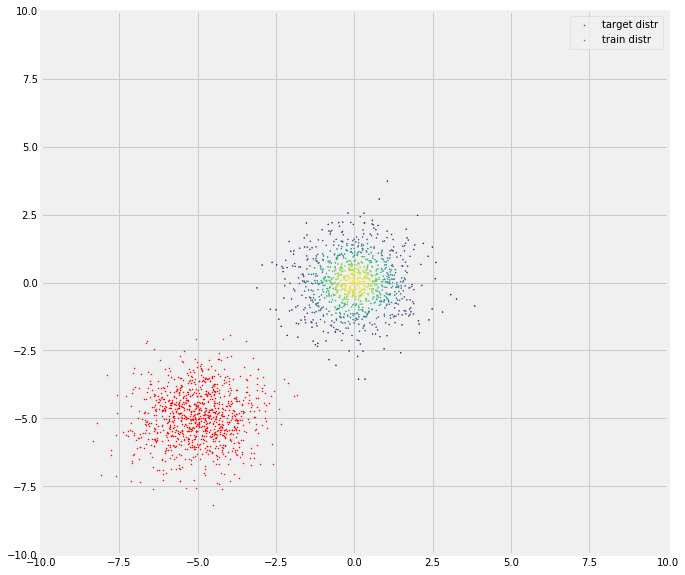

In [5]:
# starting points
train_mu, train_sigma = get_parameters()

Q = create_distr(train_mu, train_sigma)
q_sample = sample(Q, 1000)
plt.figure(figsize=(10, 10))
plot_2d_dots(x, color='r', label='target distr')
plot_2d_dots(q_sample, color= Q.log_prob(q_sample).exp().detach(), label='train distr')

plt.legend()
plt.show()

In [7]:
def kl_loss(qx, px):
    # Clamp for the numerical stability 
    px, qx = px.clamp(min=1e-7), qx.clamp(min=1e-7)
    return # YOUR CODE

# train_mu and train_sigma are TRAINABLE parameters
train_mu, train_sigma = get_parameters()

In [8]:
# Try replacing SGD with Adam
optim = torch.optim.SGD([train_mu, train_sigma], lr=0.001)

for i in range(5000):
    optim.zero_grad()
    Q = create_distr(train_mu, train_sigma)
    # qx = q(x) = probability of target samples for the train distribution
    qx = Q.log_prob(x).exp()
    loss = kl_loss(qx, px)
    loss.backward()
    optim.step()
    if i % 200 == 0:
        # plot pdfs
        clear_output(True)
        plt.figure(figsize=(10, 10))
        plt.title(f'KL={loss.item()}, iter={i}')
        plot_2d_dots(x, color='r', label='target distr')
        # q_sample - samples from the train distribution, just for visualization
        q_sample = sample(Q, 1000)
        plot_2d_dots(q_sample, color= Q.log_prob(q_sample).exp().detach(), label='train distr')
        plt.legend()
        plt.show()

# Глава 2, в которой студенты работают с 2D бимодальным распределением и узнают что KL дивергенция работает не так как нужно

### Target distr

In [9]:
target1 = create_distr(torch.Tensor([-5, -5]), torch.Tensor([[1., 0.0], [0.0, 1.]]))
target2 = create_distr(torch.Tensor([4, 3]), torch.Tensor([[1., 0.0], [0.0, 1.]]))

x = torch.cat([sample(target1, 1000), sample(target2, 1000)])

px = target1.log_prob(x).exp() + target2.log_prob(x).exp()

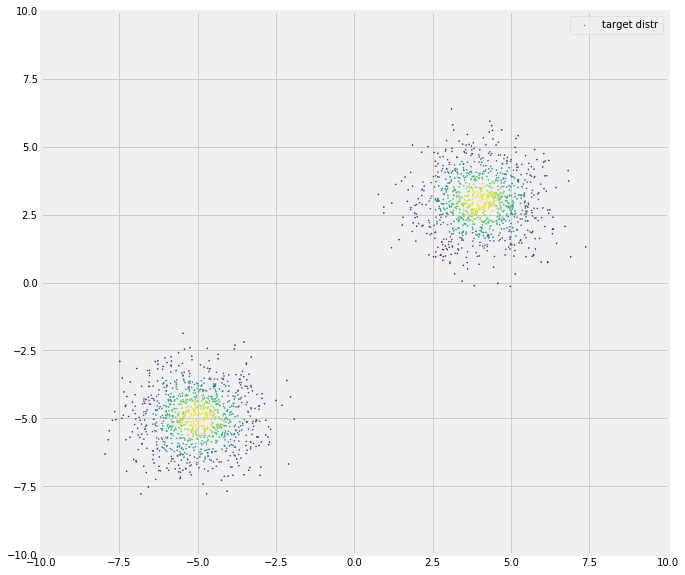

In [10]:
plt.figure(figsize=(10, 10))
plot_2d_dots(x, color=px, label='target distr')
plt.legend()
plt.show()

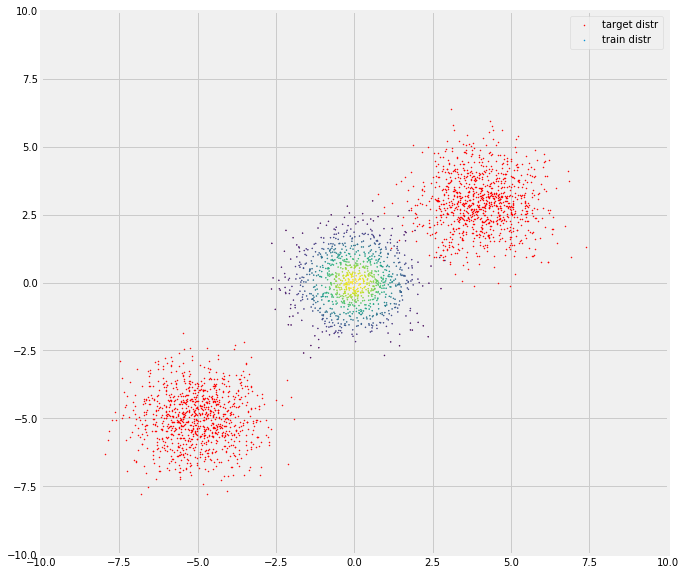

In [11]:
train_mu, train_sigma = get_parameters()

Q = create_distr(train_mu, train_sigma)
q_sample = sample(Q, 1000)
plt.figure(figsize=(10, 10))
plot_2d_dots(x, color='r', label='target distr')
plot_2d_dots(q_sample, color= Q.log_prob(q_sample).exp().detach(), label='train distr')

plt.legend()
plt.show()

In [14]:
optim = torch.optim.SGD([train_mu, train_sigma], lr=0.001)

for i in range(5000):
    optim.zero_grad()
    Q = create_distr(train_mu, train_sigma)
    qx = Q.log_prob(x).exp()
    loss = kl_loss(qx, px)
    loss.backward()
    optim.step()
    if i % 200 == 0:
        # plot pdfs
        clear_output(True)
        plt.figure(figsize=(10, 10))
        plt.title(f'KL={loss.item()}, iter={i}')
        plot_2d_dots(x, color='r', label='target distr')
        q_sample = sample(Q, 1000)
        plot_2d_dots(q_sample, color= Q.log_prob(q_sample).exp().detach(), label='train distr')
        plt.legend()
        plt.show()

# Глава 3, в которой студенты узнают что можно взять лучшее из обоих миров

#### Jensen–Shannon divergence

In [15]:
def js_div(qx, px):
    return # YOUR CODE

In [16]:
train_mu, train_sigma = get_parameters(1, 1)

In [18]:
optim = torch.optim.SGD([train_mu, train_sigma], lr=0.001)

for i in range(7000):
    optim.zero_grad()
    Q = create_distr(train_mu, train_sigma)
    qx = Q.log_prob(x).exp()
    loss = js_div(qx, px)
    loss.backward()
    optim.step()
    if i % 200 == 0:
        # plot pdfs
        clear_output(True)
        plt.figure(figsize=(10, 10))
        plt.title(f'JS={loss.item()}, iter={i}')
        plot_2d_dots(x, color='r', label='target distr')
        q_sample = sample(Q, 1000)
        plot_2d_dots(q_sample, color= Q.log_prob(q_sample).exp().detach(), label='train distr')
        plt.legend()
        plt.show()

# Глава 5, в которой студенты смотрят на другой LSE 

### Least Squares  
*as in [here](https://www.arxiv-vanity.com/papers/1611.04076/)

In [19]:
def LSE_loss(qx, px):
    return # YOUR CODE

In [20]:
train_mu, train_sigma = get_parameters(1, 1)

In [23]:
optim = torch.optim.SGD([train_mu, train_sigma], lr=0.5)

for i in range(20000):
    optim.zero_grad()
    Q = create_distr(train_mu, train_sigma)
    qx = Q.log_prob(x).exp()
    loss = LSE_loss(qx, px)
    loss.backward()
    optim.step()
    if i % 200 == 0:
        # plot pdfs
        clear_output(True)
        plt.figure(figsize=(10, 10))
        plt.title(f'LSE={loss.item()}, iter={i}')
        plot_2d_dots(x, color='r', label='target distr')
        q_sample = sample(Q, 1000)
        plot_2d_dots(q_sample, color= Q.log_prob(q_sample).exp().detach(), label='train distr')
        plt.legend()
        plt.show()

# Глава 5, в которой студенты разбираются с современными метриками


#### Inception Score

[here](https://arxiv.org/abs/1606.03498)


The idea of the IS is very simple. We can train a good classificator on the real data and use its predictions to score overall generation quality of our model

To do so:
1. Train a classifier *(for example inception network)*
2. Collect its label distribution for every generated image

![image](https://miro.medium.com/max/2976/1*X29oOi1Tzch2j6MuG9XS1Q.png)
![image](https://miro.medium.com/max/2812/1*t8lE_W4UKQ8jKgzxCAbHTA.png)

![image](https://miro.medium.com/max/3808/1*23gj_d3dxfm5FoKae_pc5Q.png)
![image.png](https://miro.medium.com/max/2772/1*xLq69Oj6_4NRZoWleg9K_Q.png)


![image](https://miro.medium.com/max/3472/1*hPEJY3MkOZyKFA6yEqzuyg.png)

###### marginal 

Идейно, чем ближе marginal распределение к равномерному, тем разнообразен и сбалансирован выход нашей модели. 

###### label 

Идейно, чем ближе label распределение к вырожденному, тем более "сфокусирован" выход нашей модели на каком-то классе

###### Overall

Теперь осталось только совместить все в одну цифру. Для этого мы можем использовать KL:

Inseption Score = $E_{x\sim P_\text{gen}} \text{exp}( KL( p_\text{label} \| p_\text{marginal}) ) $

Чем больше разница между label и marginal распределениями, тем больше становится Inseption Score, тем "лучше" себя показывает модель

Flaws in IS described here [here](https://arxiv.org/abs/1801.01973)

# Frechet Inception Distance


Похоже на IS, мы используем отдельный обученный классификатор для того чтобы получать фичи из сгенерированных изображений.

Главное - вместо распределения лейблов мы используем распределения функций активации с предпоследнего слоя, своеобразный feature representation для изображений

1. Считаем выход предпоследнего слоя классификатора для реальных и сгенерированных изображений.
2. Feature-wise считаем среднее и ковариацию распределения активация для реальных и сгенерированных изображений
3. Считаем (Fréchet distance)[https://en.wikipedia.org/wiki/Fr%C3%A9chet_distance] между ними

Frecher Distance = $\|\mu_1 – \mu_2\|^2 + Tr(C_1 + C_2 - 2 * \text{sqrt}(C_1*C_2))$

Чем FID ниже, тем выше "качество" сгенерированных изображений


The authors of the score show that lower FID scores correlate with better-quality images when systematic distortions were applied such as the addition of random noise and blur.


![image](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-How-Increased-Distortion-of-an-Image-Correlates-with-High-FID-Score.png)

In [34]:
# !pip install pytorch-pretrained-biggan
# !pip install nltk
# import nltk
# nltk.download('wordnet')
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)


def get_from_gan(labels=['soap bubble', 'coffee', 'mushroom']):
    model = BigGAN.from_pretrained('biggan-deep-256')
    class_vector = one_hot_from_names(labels, batch_size=len(labels))
    noise_vector = truncated_noise_sample(truncation=0.4, batch_size=len(labels))
    noise_vector = torch.from_numpy(noise_vector)
    class_vector = torch.from_numpy(class_vector)
    noise_vector = noise_vector.to('cuda')
    class_vector = class_vector.to('cuda')
    model.to('cuda')
    with torch.no_grad():
        output = model(noise_vector, class_vector, 0.4)

    output = output.to('cpu')
    return output

In [35]:
import torchvision
from torch import nn

classifier = torchvision.models.mobilenet_v2(pretrained=True).to('cuda')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


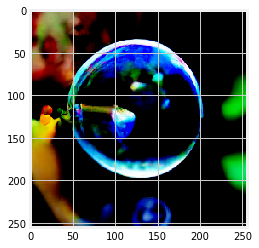

torch.Size([3, 1000])


In [37]:
plt.imshow(get_from_gan()[0].permute(1, 2, 0))
plt.show()
print(classifier(get_from_gan().to('cuda')).shape)

# Задача:

1. Используя ган и классификатор, посчитайте IS
2. Оцените глазами качество, какая из метрик лучше всего коррелирует с ним?
3. Выберите 5 худших сгенеренных картинок, посмотрите на IS

### Additional глава, в которой показывается что на KL и JS, на 1D бимодальных распределениях градиенты затухают


In [87]:
mu1, sigma1 = -3, 0.5
mu2, sigma2 = -8, 0.5


target1 = distrs.Normal(mu1, sigma1)
target2 = distrs.Normal(mu2, sigma2)

x = torch.linspace(-10, 10, 1000)
px = target1.log_prob(x).exp() + target2.log_prob(x).exp()

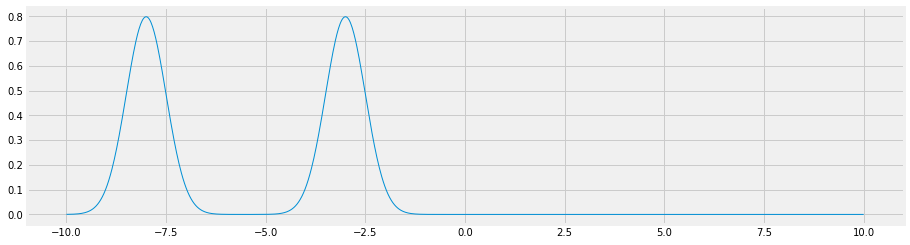

In [88]:
plt.figure(figsize=(14,4))

plt.plot(x.numpy(), px.numpy(), linewidth=1)
plt.show()


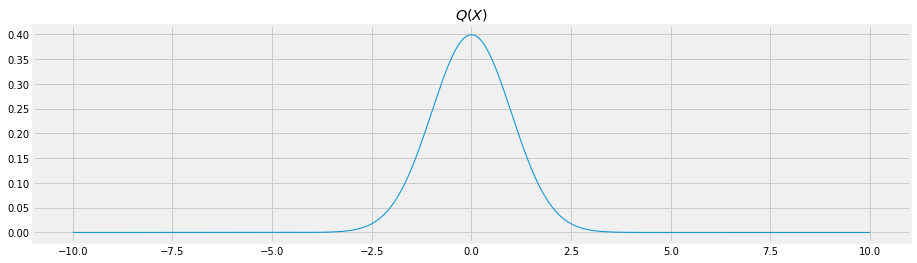

In [89]:
train_mu = torch.Tensor([0.0])
train_mu.requires_grad=True
train_sigma = torch.Tensor([1.0])
train_sigma.requires_grad=True

plt.figure(figsize=(14,4))
Q = distrs.Normal(train_mu, train_sigma)
qx = Q.log_prob(x).exp()
plt.plot(x.numpy(), qx.detach().numpy(), linewidth=1)
plt.title('$Q(X)$')
plt.show()

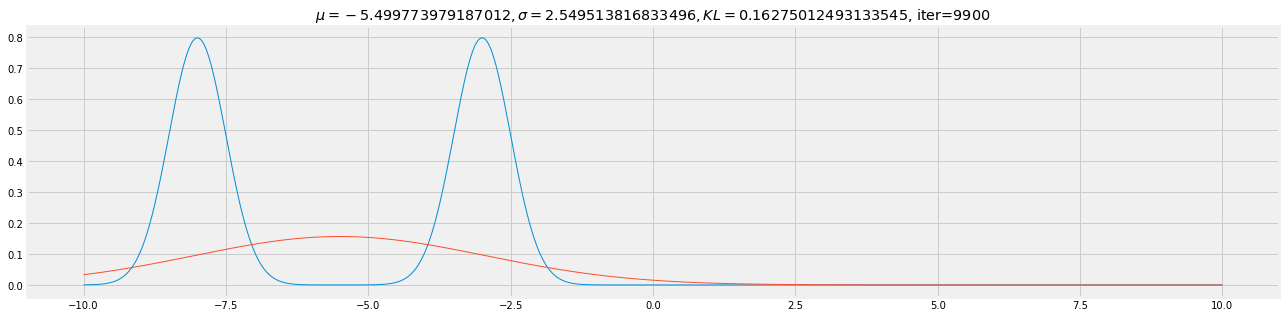

In [90]:
optim = torch.optim.SGD([train_mu, train_sigma], lr=0.1)
grads_mu = []
grads_sigma = []

for i in range(10000):
    optim.zero_grad()
    Q = distrs.Normal(train_mu, train_sigma)
    qx = Q.log_prob(x).exp()
    loss = kl_loss(qx, px)
    loss.backward()
    grads_mu.append(np.abs(train_mu.grad.item()))
    grads_sigma.append(np.abs(train_sigma.grad.item()))
    optim.step()
    if i % 300 == 0:
        # plot pdfs
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.title(f'$\mu={train_mu.item()}, \sigma={train_sigma.item()}, KL={loss.item()}$, iter={i}')
        plt.plot(x.numpy(), px.numpy(), linewidth=1)
        plt.plot(x.numpy(), qx.detach().numpy(), linewidth=1)
        plt.show()

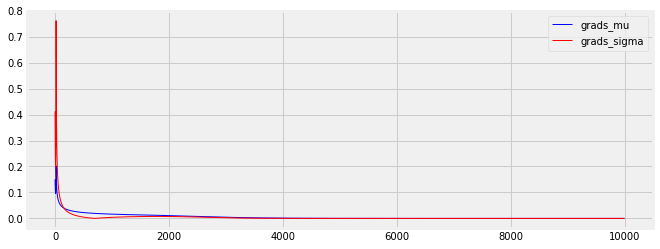

In [91]:
plt.figure(figsize=(10, 4))
plt.plot(grads_mu, c='blue', linewidth=1, label = 'grads_mu')
plt.plot(grads_sigma, c='red', linewidth=1, label = 'grads_sigma')
plt.legend()
plt.show()

###### JS

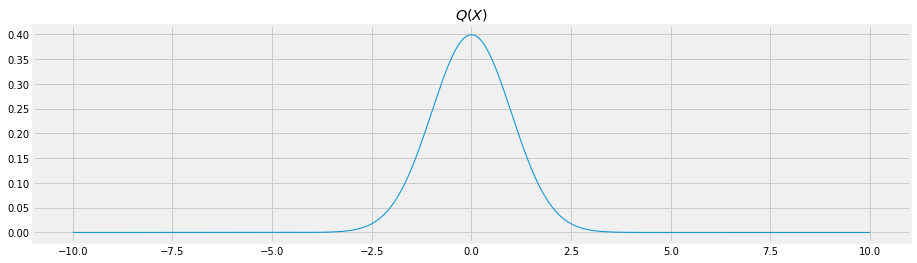

In [97]:
train_mu = torch.Tensor([0.0])
train_mu.requires_grad=True
train_sigma = torch.Tensor([1.0])
train_sigma.requires_grad=True

plt.figure(figsize=(14,4))
Q = distrs.Normal(train_mu, train_sigma)
qx = Q.log_prob(x).exp()
plt.plot(x.numpy(), qx.detach().numpy(), linewidth=1)
plt.title('$Q(X)$')
plt.show()

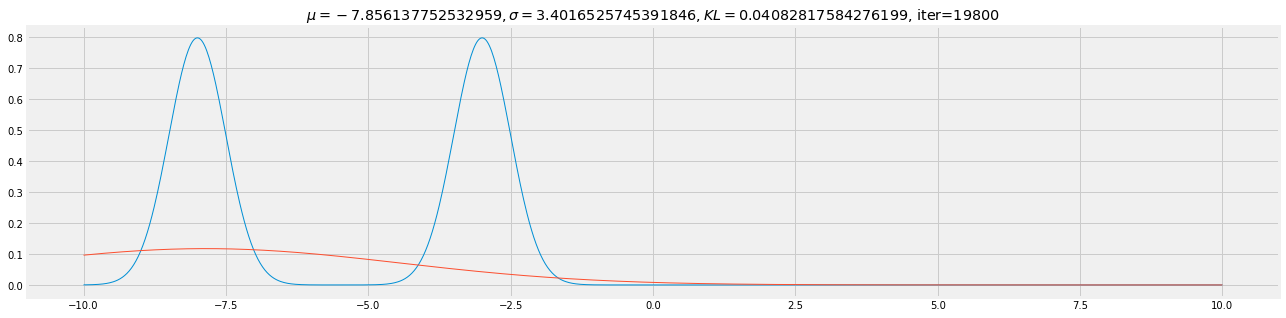

In [98]:
optim = torch.optim.SGD([train_mu, train_sigma], lr=0.5)
grads_mu = []
grads_sigma = []

for i in range(20000):
    optim.zero_grad()
    Q = distrs.Normal(train_mu, train_sigma)
    qx = Q.log_prob(x).exp()
    loss = js_div(qx, px)
    loss.backward()
    grads_mu.append(np.abs(train_mu.grad.item()))
    grads_sigma.append(np.abs(train_sigma.grad.item()))
    optim.step()
    if i % 300 == 0:
        # plot pdfs
        clear_output(True)
        plt.figure(figsize=(20, 5))
        plt.title(f'$\mu={train_mu.item()}, \sigma={train_sigma.item()}, KL={loss.item()}$, iter={i}')
        plt.plot(x.numpy(), px.numpy(), linewidth=1)
        plt.plot(x.numpy(), qx.detach().numpy(), linewidth=1)
        plt.show()

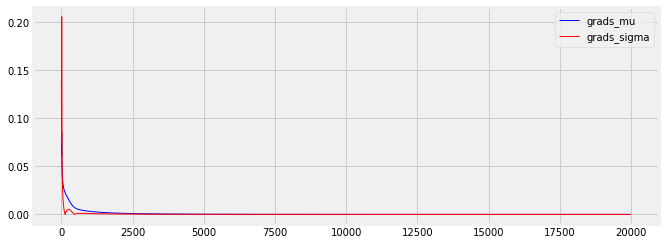

In [99]:
plt.figure(figsize=(10, 4))
plt.plot(grads_mu, c='blue', linewidth=1, label = 'grads_mu')
plt.plot(grads_sigma, c='red', linewidth=1, label = 'grads_sigma')
plt.legend()
plt.show()